In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import random
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image, ImageChops, ImageEnhance
from IPython.display import display # to display images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/CASIA/Au"
dst_dir = "/content/drive/MyDrive/CASIA2/Au"
i=0
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    if i>1000:
      break
    shutil.copy(jpgfile, dst_dir)
    i+=1

In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/CASIA/Tp"
dst_dir = "/content/drive/MyDrive/CASIA2/Tp"
i=0
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    if i>1000:
      break
    shutil.copy(jpgfile, dst_dir)
    i+=1

# New Section

In [ ]:
def ELA(img_path):
    """Performs Error Level Analysis over a directory of images"""
    
    TEMP = 'ela_' + 'temp.jpg'
    SCALE = 10
    original = Image.open(img_path)
    try:
        original.save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original, temporary)
        
    except:
        
        original.convert('RGB').save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original.convert('RGB'), temporary)
        
       
    d = diff.load()
    
    WIDTH, HEIGHT = diff.size
    for x in range(WIDTH):
        for y in range(HEIGHT):
            d[x, y] = tuple(k * SCALE for k in d[x, y])

    return diff

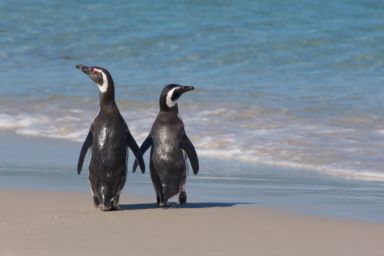

In [ ]:
orig_img = Image.open('/content/drive/MyDrive/CASIA/Au/Au_ani_00069.jpg')
display(orig_img)

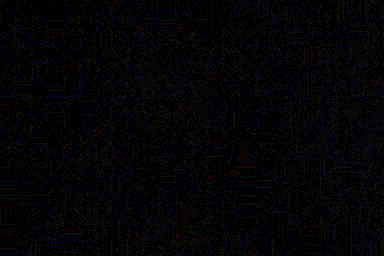

In [ ]:
ELA('/content/drive/MyDrive/CASIA/Au/Au_ani_00068.jpg')

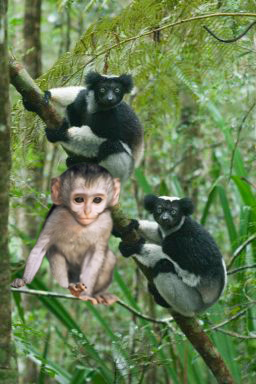

In [ ]:
tampered_img = Image.open('/content/drive/MyDrive/CASIA/Tp/Tp_D_CND_S_N_ani00073_ani00068_00193.tif')
display(tampered_img)

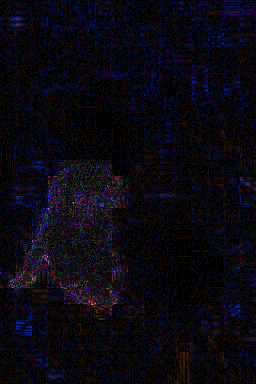

In [ ]:
ELA('/content/drive/MyDrive/CASIA/Tp/Tp_D_CND_S_N_ani00073_ani00068_00193.tif')

In [ ]:
path_original = '/content/drive/MyDrive/CASIA2/Au/'
path_tampered = '/content/drive/MyDrive/CASIA2/Tp/'

total_original = os.listdir(path_original)
total_tampered = os.listdir(path_tampered)

In [ ]:
len(total_original)

7492

In [ ]:
len(total_tampered)

5124

In [ ]:
images = []

for file in tqdm(os.listdir(path_original)):
    try:
        if file.endswith('jpg'):
            if int(os.stat(path_original + file).st_size) > 10000:
                line = path_original + file  + ',0\n'
                images.append(line)
    except:
        print(path_original+file)

100%|██████████| 1001/1001 [00:00<00:00, 5385.44it/s]


In [ ]:
for file in tqdm(os.listdir(path_tampered)):
    try:
        if file.endswith('jpg'):
            if int(os.stat(path_tampered + file).st_size) > 10000:
                    line = path_tampered + file + ',1\n'
                    images.append(line)
        if file.endswith('tif'):
            if int(os.stat(path_tampered + file).st_size) > 10000:
                    line = path_tampered + file + ',1\n'
                    images.append(line)
    except:
          print(path_tampered+file)

100%|██████████| 1001/1001 [00:00<00:00, 5366.73it/s]


In [ ]:
len(images)

12389

In [ ]:
image_name = []
label = []
for i in tqdm(range(len(images))):
    image_name.append(images[i][0:-3])
    label.append(images[i][-2])

100%|██████████| 2002/2002 [00:00<00:00, 265820.27it/s]


In [ ]:
dataset = pd.DataFrame({'image':image_name,'class_label':label})

In [ ]:
dataset['class_label'].value_counts()

1    1001
0    1001
Name: class_label, dtype: int64

In [ ]:
dataset.head()

,image,class_label
0,/content/drive/MyDrive/CASIA/Au/Au_sec_20079.jpg,0
1,/content/drive/MyDrive/CASIA/Au/Au_sec_30014.jpg,0
2,/content/drive/MyDrive/CASIA/Au/Au_sec_30074.jpg,0
3,/content/drive/MyDrive/CASIA/Au/Au_pla_30543.jpg,0
4,/content/drive/MyDrive/CASIA/Au/Au_sec_00041.jpg,0


In [ ]:
dataset.to_csv('dataset_casa2.csv',index=False)

In [ ]:
dataset = pd.read_csv('dataset_casa2.csv')

In [ ]:
len(dataset)

12389

In [ ]:
x_casia = []
y_casia = []

In [ ]:
for index, row in tqdm(dataset.iterrows()):
    x_casia.append(np.array(ELA(row[0]).resize((128, 128))).flatten() / 255.0)
    y_casia.append(row[1])

2002it [05:41,  5.86it/s]


In [ ]:
x_casia = np.array(x_casia)
y_casia = np.array(y_casia)

In [ ]:
from numpy import save
## save all the data 
save('X_casia.npy', x_casia)
save('Y_casia.npy',y_casia)

NameError: ignored

In [ ]:
from numpy import load
x_casia = load('/content/X_casia.npy')
y_casia = load('/content/Y_casia.npy')

FileNotFoundError: ignored

In [ ]:
x_casia = x_casia.reshape(-1, 128, 128, 3)
y_casia = to_categorical(y_casia, 2)
x_casia[0]

array([[[0.08235294, 0.06666667, 0.10196078],
        [0.06666667, 0.06666667, 0.08627451],
        [0.04313725, 0.03921569, 0.04705882],
        ...,
        [0.06666667, 0.04313725, 0.10588235],
        [0.09019608, 0.0627451 , 0.09803922],
        [0.05098039, 0.04313725, 0.03529412]],

       [[0.10588235, 0.11372549, 0.11372549],
        [0.0745098 , 0.08235294, 0.0745098 ],
        [0.04705882, 0.05490196, 0.05490196],
        ...,
        [0.04313725, 0.03529412, 0.05490196],
        [0.05882353, 0.03921569, 0.07058824],
        [0.04313725, 0.03921569, 0.05098039]],

       [[0.09019608, 0.09411765, 0.09803922],
        [0.05098039, 0.09019608, 0.09411765],
        [0.05882353, 0.09019608, 0.09803922],
        ...,
        [0.04313725, 0.02745098, 0.03921569],
        [0.05490196, 0.04705882, 0.05490196],
        [0.04705882, 0.04705882, 0.09019608]],

       ...,

       [[0.01176471, 0.01176471, 0.01568627],
        [0.01176471, 0.01176471, 0.01568627],
        [0.01176471, 0

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_casia, y_casia, test_size = 0.2, random_state=5)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [ ]:
optimizer = Adam()

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
early_stopping = EarlyStopping(monitor='val_acc',
                              min_delta=0,
                              patience=2,
                              verbose=1, mode='auto')

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 100, epochs = 5, 
          validation_data = (X_val, Y_val), verbose = 1, callbacks=[early_stopping])

Epoch 1/5
17/17 [==============================] - 151s 9s/step - loss: 0.5856 - accuracy: 0.6540 - val_loss: 0.5487 - val_accuracy: 0.6509
Epoch 2/5
17/17 [==============================] - 150s 9s/step - loss: 0.5298 - accuracy: 0.6802 - val_loss: 0.4751 - val_accuracy: 0.7082
Epoch 3/5
17/17 [==============================] - 149s 9s/step - loss: 0.5633 - accuracy: 0.6677 - val_loss: 0.5231 - val_accuracy: 0.7057
Epoch 4/5
17/17 [==============================] - 150s 9s/step - loss: 0.5219 - accuracy: 0.7245 - val_loss: 0.4612 - val_accuracy: 0.7057
Epoch 5/5
17/17 [==============================] - 152s 9s/step - loss: 0.5243 - accuracy: 0.6996 - val_loss: 0.4630 - val_accuracy: 0.6908


In [ ]:
from numpy import asarray
import numpy as np
numpydata = asarray(img1)
numpydata = np.resize(numpydata,(1,256,384,3))
print(numpydata.shape)
# print(type(numpydata))
# numpydata.resize((1,128,128,3))
# numpydata.reshape(1,128,128,3)

(1, 256, 384, 3)


In [ ]:
img1 = Image.open('/content/drive/MyDrive/CASIA2/Tp/Tp_D_NRN_M_N_ind00040_cha00036_11778.jpg')


In [ ]:
print(model.predict(numpydata))

InvalidArgumentError: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/new_model_casia.h5')

In [ ]:
fig = plt.figure()
p1 = fig.add_subplot(221)
p2 = fig.add_subplot(222)
p3 = fig.add_subplot(223)
p4 = fig.add_subplot(224)
p2.set_ylim(0,1)
p4.set_ylim(0,1)
p1.grid()
p2.grid()
p3.grid()
p4.grid()
p2.set_yticks(np.arange(0,1,0.1))
p4.set_yticks(np.arange(0,1,0.1))
x = [i for i in range(5)]
y = history.history['loss']
y2 = history.history['acc']
y3 = history.history['val_loss']
y4 = history.history['val_acc']
p1.plot(x,y, 'r', label='train_loss')
p1.legend()
p2.plot(x,y2, 'b', label='train_accuracy')
p2.legend()
p3.plot(x,y3, 'r', label='val_loss')
p3.legend()
p4.plot(x,y4, 'b', label='val_accuracy')
p4.legend()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
y_pred_cnn = model.predict(X_val)
y_pred_cnn = np.argmax(y_pred_cnn,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 

score = metrics.precision_score(Y_true,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(Y_true, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/new_model_casia.h5')

In [ ]:
from numpy import asarray
import numpy as np
numpydata=np.array(ELA('/content/drive/MyDrive/CASIA2/Au/Au_txt_00013.jpg').resize((128, 128))).flatten() / 255.0
numpydata = np.resize(numpydata,(1,128,128,3))
print(numpydata.shape)

(1, 128, 128, 3)


In [ ]:
model.predict(numpydata)

array([[0.571819  , 0.42818102]], dtype=float32)

In [ ]:
import seaborn as sns
cm = confusion_matrix(Y_true, y_pred_cnn)
print('Confusion matrix:\n',cm)

print(classification_report(Y_true, y_pred_cnn))

print('Plot of Confusion Matrix')
df_cm = pd.DataFrame(cm, columns=np.unique(Y_true), index = np.unique(Y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(Y_true,y_pred_cnn))
df_cm